
 # Objetivo del laboratorio
 El objetivo de la presenta práctica es conocer el estándar de simulación de circuitos [SPICE](http://bwrcs.eecs.berkeley.edu/Classes/IcBook/SPICE) y realizar pequeñas simulaciones en corriente continua con el mismo. SPICE es una forma elegante y sencilla de codificar circuitos eléctricos de manera que puedan ser procesados por un ordenador. Mediante un sencillo lenguaje podemos definir resistencias, fuentes de alimentación, etc., las conexiones entre ellos y los resultados que deseamos obtener.

 # El estándar SPICE
 **SPICE** es una abreviabiación de *Simulation Program with Integrated Circtuit Emphasis*.
 Se trata básicamente de un método estándar para describir circuitos usando texto plano en
 lugar de una representación gráfica (o *esquemática*). A esta descripción en texto se
 la llama también **netlist** y básicamente se corresponde con la *lista* de los componentes del circuito y cómo estos están conectados entre sí, es decir, de los nodos de unión.
 Los ficheros netlist pueden tener extensiones `.cir`, `.net`, `.ckt`, ó `.sp` y es muy común encontrárselos con cualquiera de estas.

 Existen en el mercado muchas variantes (intérpretes) de Spice, aunque el original fue descrito
 en la Universidad de Berkeley. En la lista de intérpretes de Spice tenemos desde esfuerzos y proyectos comerciales hasta *open source* y regidos por distintas comunidades de usuarios y programadores.

> **Pregunta:** Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente). Aquí tienes un ejemplo del que puedes partir y seguir completando:



> | Intérprete              | Licencia      | Fabricante                   | Características            |
 | :---------------------: | :-----------: | :-----------------:          | :----------------:         |
 | Ahkab                   | GPL           | Giuseppe Venturini           | Basado en Python           |     
 | OrCAD                   | Privativa     | Cadence Design System        | Basado en C/C++            |
 | Proteus Design Suite    | Privativa     | Labcenter Electronics Ltd.   | Sistema Operativo Windows  |
 | gEDA                    | GNU GPL       | Ales Hvezda                  | Sistema Operativo Unix-like|
 | Qucs                    | GNU GPL       | Michael Margraf, Stefan Jahn | Basado en C++              |

 >   \*    Public Domain Software
 >   **   Berkeley Software Distribution 
    
 > **Pregunta:** ¿Qué comparación puedes efectuar entre C y Spice como estándares (lenguajes) y sus respectivas implementaciones en software? ¿Qué implementaciones reales (compiladores) del lenguaje C conoces? 

> Entre los estándares C y Spice podemos podemos decir que ambos tienen unas series de palabras reservadas que nos sirven para poder estructurar nuestro código ya sea en C a la hora de programar como en Spice a la hora de crear un circuito. Por ejemplo si en Spice queremos describir una Resistencia siempre se hace de la misma forma escribimos el nombre con R y luego si la queremos identificar para diferenciarla de otras le añadimos un número o un caracter por ejemplo R1 a continuación entre los nodos que se encuentra R1 0 1 y finalemente la cantidad de la propia resistencia **<u>R1 0 1 5k</u>**. En C si queremos definir una variable de tipo entero siempre se realizaría de la misma forma int \[nombre de la variable\] y si queremos iniciarlizarla a un valor ponemos igual y el valor por ejemplo **<u>int numeroPar = 2</u>**;

> **GCC** -> Compilador integrado en proyecto GNU. Las siglas significan GNU Compiler Collection (anteriormente significaban GNU C Compiler, ya que solo era capaz de                   compilar el leguanje C. Actualmente es capaz de compilar lenguajes como C++ o Fortran  entre otros). Es software libre bajo licencia pública GPL y es estándar             para s.o basados en Unix como Solaris, macOs, Red Hat o Debian. Desarrollado por Proyecto GNU.

> __Clang__ -> Diseñado como alternativa a GCC, es de código abierto bajo licencia University of Illinois/NCSA. Es capaz de compilar lenguajes como C, C++, Objetive-C y                  Objetive-C++. Está desarrollado por empresas como Apple, Microsoft, Google, Sony entre otros.

> __MinGW__ -> Es una implementación del anteriormente citado GCC para la plataforma de Windows. Es una bifurcación de Cygwin (herramientas desarolladas para Windows con                 el objetivo de que tengan el mismo comportamiento que en Unix). Es capaz de compilar lenguajes como C, C++, Fortran, Ada entre otros y está bajo licencia                  GPL. Creado por Colin Peters.
 
> __Visual C++__ -> Es el compilador propio que tiene el IDE de desarrollo Visual C++ desarrollado por Microsoft.

 ## Elementos de un netlist
 Como acabamos de comentar, un netlist se corresponde con la codificación de los elementos electrónicos de un circuito y las uniones entre los mismos. Veamos con más concreción qué partes y secciones lo componen.

 ## Comentarios

 La primera línea de un netlist se corresponderá siempre con un comentario. A partir de esta línea se pueden introducir más comentarios pero tienen que ir siempre precedidos de un `*`. Ejemplo:
 
 ```spice
 Mi primer circuito
 * Otro comentario
 * más comentarios
 *
 ```

 ## Dispositivos básicos de un circuito
 Los elementos de un netlist son los mismos que encontramos en cualquier circuito eléctrico sencillo,
 tales como resistencias, **condensadores**, **bobinas**, **interruptores**, **hilos** y **fuentes** de alimentación.
 Para distinguir uno de otro, se reserva una letra característica: `V` para fuentes de alimentación, `R` para resistencias, `C` para condensadores y `L` para bobinas. También es posible usar estas letras en su versión en minúscula (`r`, `v`, `c`, `l`, etc.).
 Después de esta letra característica se puede sufijar cualquier texto para diferenciar un elemento de otro (números, letras, palabras, etc.). Ejemplo:

 ```
 * Una resistencia
 R1
 *  Otra resistencia
 R2
 * Fuente de alimentación
 V
 * Un condensador
 Cprincipal
 ```

 ## Conexiones
 A continuación de indicar el elemento eléctrico, tenemos que informar a Spice cuáles
 son los puntos de unión tanto a un lado como al otro del elemento.
 Así es como Spice sabe qué está conectado a qué: porque comparten un **punto**
 (o **nodo**, aunque este término se reserva sobretodo a uniones de más de dos elementos)
 que hemos señalizado correctamente. Para nombrar nodos, lo mejor es emplear una
 numeración secuencial: 0...n. **La enumeración de los puntos de unión es completamente
 a nuestro criterio**.

 ```
 * Una resistencia
 * entre cables 0 y 1
 R1 0 1
 ```

 **Sólo es necesario seguir un criterio**: en el caso de una
 fuente de alimentación, el nodo que pondremos primero será
 aquel que está más cerca del *borne* positivo. Ejemplo:

 ```spice
 * Para una fuente indicamos primeramente conexión a nodo positivo.
 v 2 3 type=vdc vdc=1
 ```
 
En el *caso de LTspice* no es necesario indicar los parámetros `type=vdc` y `vdc=X`, sino que si no se especifica nada, se supone que el último valor es el del voltaje a corriente continua:

```spice
* Especificación de una fuente de alimentación de 10 V en corrient continua en el caso de LTspice
v 0 1 10
```

Aquí tienes un ejemplo gráfico de los componentes comentados justo arriba (resistencia y voltaje):

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencia%20y%20pila%20con%20nodos.svg?sanitize=true)

 ## Unidades en SPICE

 Las unidades de las magnitudes características del circuito son siempre [unidades
 del Sistema Internacional](https://en.wikipedia.org/wiki/SI_electromagnetism_units) y no es necesario indicarlo explícitamente en el netlist.

 La forma de especificar múltiplos de estas cantidades es añadiendo una letra.
 Básicamente las que nos interesan y las que suelen aparecer mayoritariamente son `k` para "kilo-," `m` para "mili?" y `u` para "micro?".

 > **Pregunta:** Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.

>| Abreviatura 	| Prefijo 	| Factor 	|
|:-----------:	|:-------:	|-------:	|
| Y           	| yotta 	   | $10^{24}$ 	|
| Z              | zetta 	   | $10^{21}$ 	|
| E           	| exa 	   | $10^{18}$ 	|
| P           	| peta 	   | $10^{15}$	|
| T           	| tera 	   | $10^{12}$	|
| G           	| giga  	   | $10^9$	|
| M           	| mega 	   | $10^6$  	|
| k           	| kilo 	   | $10^3$  	|
| h           	| hecto 	   | $10^2$  	|
| da          	| deca 	   | $10^1$  	|
| d           	| deci  	   | $10^{-1}$	|
| c           	| centi 	   | $10^{-2}$	|
| m           	| mili 	   | $10^{-3}$	    |
| µ           	| micro 	   | $10^{-6}$	    |
| n           	| nano 	   | $10^{-9}$    |
| p           	| pico  	   | $10^{-12}$	|
| f           	| femto 	   | $10^{-15}$ 	|
| a           	| atto 	   | $10^{-18}$ 	|
| z           	| zepto 	   | $10^{-21}$ 	|
| y           	| yocto 	   | $10^{-24}$	|

 En el caso de las fuentes de alimentación hemos de especificar si se trata de corriente contínua (`vdc`) o alterna (`ac`).

 ```
 * Una resistencia de 5 Ohmios
 R2 1 0 5
 * Una pila de 10 Voltios (continua)
 V1 1 0 type=vdc vdc=10
 * Una resistencia de 5 kΩ
 RX 2 4 5k
 ```

 > **Pregunta**: ¿qué unidades del Sistema Internacional relacionadas con la asignatura –y los circuitos en general– conoces? Responde aquí mismo en una celda de Markdown con una tabla.

 >| Magnitud Física 	            | Símbolo Unidad 	    | Simbolo 	|
 |:-----------------:          	|:---------------:	    |:--------:	|
 | Masa 	                        | Kilogramo 	        | Kg 	|
 | Longitud 	                    | Metro 	            | m 	|
 | Tiempo          	            | Segundo 	            | s 	|
 | Cantidad de sustancia           | Mol	                | mol 	|
 | Temperatura 	                | Kelvin 	            | K 	|
 | Intensidad corriente eléctrica 	| Amperio 	            | A 	|
 | Presión                         | Pascal             	| Pa 	|
 | Intensidad luminosa         	| Candela 	            | cd 	|

 ## Valores iniciales

 Aparecen justo al final de la definición del componente (`ic`). Suelen aplicarse principalmente con condensadores.

 ```
 * Una condensador inicialmente no cargado
 c 1 0 1u ic=0
 ```

 ## Fin del circuito

 El fin de la descripción de un netlist se especifica mediante el
 comando `.end`.

 ```spice
 * Mi primer circuito
 V 1 0 vdc=10 type=vdc
 R 1 0 5
 * Fin del circuito
 .end
 ```


 ## Comandos SPICE para circuitos en corriente continua

 Además de la descripción del circuito, hemos de indicar al intérprete de Spice qué
 tipo de análisis queremos realizar en sobre el mismo y cómo queremos presentar
 la salida de la simulación. Los comandos en Spice empiezan por un `.` y suelen
 escribirse justo al final del circuito, pero antes del comando `.end`.

 ```
  Mi primer circuito
 * Aquí van los componentes
 R 1 0 6k
 ...
 * Comandos
 .op
 ...
 * Fin del circuito
 .end
 ```

 > **Pregunta**: Hasta lo que has visto del lenguaje Spice, ¿dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos ¿Funcionales? Justifica tu respuesta. 

 > Considero que el lenguaje SPICE es ***<u>específico de dominio</u>***, ya que está dedicado a un problema de dominio particular. Su finalidad es resolver problemas        dentro de un campo concreto (circuitos eléctricos) y con él no se pueden resolver otro tipo de problemas relacionados con otros ámbitos como podrían ser un software       para la detección de cohetes en las fragatas de la armada española (desarrollado por un servidor para el Ministerio de defensa) o un software para la gestión de un        banco.

 > No considero que el leguaje SPICE sea de programación estructurado como Pascal, ALGOL o Ada, ya que no contiene estructuras de control (if, else o switch) o de
  iteración como los bucles (for, while o do while). Por otro lado, tampoco lo considero ni programación procedimental ni funcional. Porque, aunque estas se diferencien     en que la programación procedimental se usa en lenguajes a bajo nivel y la funcional en los de alto nivel, ambos tipos de programación contienen estructuras propias       de control o iteración, como en la programación estructurada. Además, a diferencia del SPICE, tanto la programación procedimental como la funcional se basan en aunar      pocas expresiones repetidas en procedimientos o funciones y llamarlas cada vez que se necesite.
  
 > Por último, tampoco se podría considerar que SPICE sea un lenguaje orientado a objetos ya que no posee abstracción, herencia, encapsulamiento, polimorfismo ni
  ninguna de las otras características de dichos lenguajes (Java, Phyton, Rubi y un largo etc).

 Veamos los principales comandos de simulación:

 - `.op` es el comando más sencillo que podemos emplear en. Devuelve el voltaje e intensidad en cada ramal y componente del circuito. Este comando no necesita parámetros.
 - `.dc` es uy parecido al comando `.op` pero nos permite cambiar el valor del voltaje de una fuente de alimentación en pasos consecutivos entre el valor A y el valor B.
 En el caso de que la fuente tuviera asignada ya un valor para su voltaje, este sería ignorado. Ejemplo:


 ```spice
 * Variamos el valor del voltaje
 * de la fuente "v" de 1 a 1000
 * en pasos de 5 voltios
 v 1 0 type=vdc vdc=10
 .dc v 1 start=1 stop=1000 step=20
 v2a 2 4 type=vdc vdc=9
 * Igual para v2a. Se ignora su voltaje de 9V
 .dc v2a start=0 stop=10 step=2
 ```

 - El comando `.tran` realiza un análisis en el tiempo de los parámetros del
 circuito. Si no se emplea la directiva `uic` (*use initial conditions*) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo `tfinal`.
 y en intervalos `tstep`. Si empleamos un varlor distinto para parámetro `uic`,
 entonces se hará uso de las condiciones iniciales definidas para cada componente
  (típicamente `ic=X` en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).


 ```
 * Hacemos avanzar el tiempo entre
 * tinicial y tfinal en pasos tstep
 .tran tstart=X tstop=Y tstep=Z uic=0/1/2/3
 ```

 `X`, `Y` y `Z` tienen, evidentemente unidades de tiempo en el S.I. (segundos).

 > **Pregunta**: El parámetro `uic` puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la [documentación de Ahkab](https://buildmedia.readthedocs.org/media/pdf/ahkab/latest/ahkab.pdf).

 > El ***<u>parámetro UIC</u>*** se usa para especificar en estado del circuito en el timpo t = tstart. Existen cuatro valores posibles para este estado:
   * Si uic = 0: Para cada voltaje y corriente en todos los nodos su valor será cero cuando pase a través de las fuentes v/h/e en t = tstart.
   * Si uic = 1: El estado en t = tstart es el último resultado de un análisis OP.
   * Si uic = 2: El estado en t = tstart es el último resultado de un análisis OP en el que se establecen los valores de corrientes a través de inductores y voltajes en                    condesadores especificados en su ic. Esto se hace de una forma aproximada y se recomienda comprobarlo.
   * Si uic = 3: Carga un ic suministrado por el usuario. Esto requiere una directiva .ic en algún lugar de la lista de red y el nombre y la etiqueta deben conicidir.

 ## Intérprete SPICE que vamos a usar: Ahkab
 Tras un estándar siempre hay una o varias implementaciones. Ahkab no deja de ser una implmentación más en Python del estándar Spice.
 > **Pregunta:** Comenta las distintas implementaciones de lenguajes y estándares que conozcas. Hazlo usando una tabla en Markdown. [Aquí](https://www.markdownguide.org/extended-syntax/#tables) tienes un poco de ayuda (aunque antes ya se ha puesto el ejemplo de una tabla).

> | Implementaciones              | Lenguaje      | Desarrollado                                                 | Características            | Licencia |
 | :---------------------       | :-----------: | :----------------------------------------------------------: | :----------------:         |-------: |
 | CPython                       | Python        | Autor: Guido van Rossum, Desarrollado: Comunidad Python      | Escrito en C               | Python Software Foundation License |
 | IronPython                    | Python        | Autor: Jim Hugunin y Microsoft, Desarrollado: Dino Viehland  | Escrito en C#              | Liencia Apache|
 | Jython                        | Python        | Comunidad Jython                                             | Escrito en Java            | GPL y posterior Jython Software License|
 | PyPy                          | Python        | Proyecto PyPy                                                | Basado en Python y RPython | Licencia MIT |     
 | Visual C++                    | C++           | Microsoft                                                    | Escrito en ASM/C/C++       | EULA |
 | C++ Builder                   | C++           | Embarcadero Tecnologies                                      | Escrito en C++             | Propietario |
 | Intel C++ Compiler            | C++           | Intel                                                        | Escrito en C y C++         | Software no libre|
 | Code::Blocks                  | C++           | The Code::Blocks team                                        | Escrito en C++             | GNU General Public License|
 
 > **Pregunta:** Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.).

 > Ahkab es un intérprete de SPICE de código abierto, implementado en Python y desarrollado por su creador Giuseppe Venturini. Este intérprete tiene como objetivo            diseñar circuitos y comprobar que dicho circuito funciona realmente como se espera según se vayan realizando ajustes y cambios. 
    A continuación se adjunta una tabla con las distintas versiones: 

 > | Versión                 | Fecha         |
 | :---------------------: | :-----------: |
 | 0.12                    | 07/01/2015    |
 | 0.13                    | 17/02/2015    |
 | 0.14                    | 20/04/2015    | 
 | 0.15                    | 20/04/2015    |      
 | 0.15.1                  | 20/04/2015    | 
 | 0.16                    | 03/05/2015    | 
 | 0.17                    | 17/05/2015    | 
 | 0.18                    | 12/07/2015    | 

> Todas estas versiones están bajo licencia GNU General Public License (GPL) y los requerimientos son: 
      * Python 2 (al menos la versión 2.6) o Python 3 (al menos la versión 3.3).</li>
	   * Numpy mayor o igual a la versión 1.7.0 .
	   * Scipy mayor o igual la versión 0.14.0 .
	   * Sympy mayor o igual a la versión 0.7.6 .
	   * Tabular superior a la versión 0.7.3 .

> También está recomendado versión igual o superior a la 1.1.1 de matplotlib para poder ejecutar el conjunto de pruebas.


 # Trabajo práctico
 Muy bien, ahora toca definir circuitos y ejecutar simulaciones sobre los mismos gracias a Ahkab.
 ## Instalación de bibliotecas necesarias
 Si estás utilizando Anaconda, asegúrate de tener su entorno activado:
 
 ```cmd
 C:\> conda activate base (en el caso de Windows)
 ```
 ó

 ```bash
 $ source /usr/local/Caskroom/miniconda/base/bin/activate (en el caso de macOS)
 ```

 En el caso de Windows tienes que tener en el PATH el directorio donde se encuentre el comando `conda` (visita la sección de [Environment Variables](https://superuser.com/questions/949560/how-do-i-set-system-environment-variables-in-windows-10) del [Panel de Control](https://www.digitalcitizen.life/8-ways-start-control-panel-windows-10)). Si has instalado Anaconda con [esta opción](https://docs.anaconda.com/_images/win-install-options.png) marcada, ya no tienes que preocuparte por ello. 

 Ahora ya puedes instalar Ahkab:

 ```
 (base) $ pip install ahkab
 ```

 Como siempre, una vez instalado cualquier framework para Python, ya lo podemos utilizar, tanto desde el [REPL](https://en.wikipedia.org/wiki/Read–eval–print_loop) como desde un entorno Jupyter (Jupyter, [Jupyterlab](http://jupyterlab.readthedocs.io/en/stable/), VS Code o nteract). Recuerda que para usar el kernel Python (que viene con Anaconda) desde nteract debes seguir las instrucciones que se indican en su [documentación oficial](https://nteract.io/kernels).  

In [1]:
import pylab as plt
import ahkab

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.


También vamos a importar Sympy para hacer algún cálculo más *manual* más adelante:

In [2]:
import sympy.physics.units as u
from sympy.physics.units import Dimension 
from sympy import * 
from sympy.physics.units import convert_to


> Comprobación de que la ecuación V = I * R está ajustada dimensionalmente

In [46]:
V = 1*u.volts
R = 1*u.ohms

intensidad = u.Quantity('i')
intensidad.set_dimension(u.current)
ley_ohm = Eq(V, intensidad*R)
pprint(ley_ohm)

volt = i⋅ohm


 > **Pregunta:** ¿Qué es y para qué sirve PyLab?

 > PyLab es un conjunto de librerías (numpy, scipy, sympy, matplotlib entre otras) con el fin de poder realizar diversas funcionalidades como generar gráficas a partir de los datos que tenemos en Python, implementar algoritmos y la representación de datos y funciones. Este conjunto de librerías lo podríamos asemejar al sistema de cómputo numérico Matlab.
#

 ## Circuitos sencillos para trabjar con la ley de Ohm:

 La *mal llamada* ley de Ohm reza que el voltaje (la *energía por unidad de carga*) que se disipa en un tramo de un circuito eléctrico es equivalente a la intensidad ($I$) de la corriente (es decir, cuántos electrones circulan por unidad de tiempo) por la resistencia del material ($R$) en el que está desplazándose dicha corriente. Matemáticamente:

 $$
 V = I\cdot R
 $$

 > **Pregunta:** comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.

 > La comprobación está en la celda de arriba



 Comencemos con el circuito más sencillo posible de todos:

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true)

 Vamos a escribir su contenido (componentes o *netlist*) en disco con el nombre `circuito sencillo.sp`. Esto lo podemos lograr directamente y en tiempo real desde una celda de Jupyter gracias a los *comandos mágicos* de este entorno de programación literaria. En concreto vamos a utilizar `%%writefile` que guarda los contenidos de una celda como un fichero. 

In [32]:
%%writefile "circuito sencillo.sp"
* Este es un circuito sencillo
r1 1 0 100
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end


Overwriting circuito sencillo.sp


Ahora vamos a leer su descripción con Ahkab, interpretar y ejecutar las simulaciones que en él estén descritas.

In [33]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito sencillo.sp')

 Separamos la información del netlist (componentes) de los análisis (uno de tipo `op` y otro de tipo `dc`):

In [34]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
print(lista_de_análisis)


[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


> **Pregunta:** ¿qué tipo de estructura de Python es `lista_de_análisis`?

> En Python esto sería una ***<u>lista de diccionarios</u>***. Los diccionarios son un tipo de estructura de datos realacionados entre sí con clave-valor y los podríamos comparar con los HashMap, Treemap o Linkedhashmap de Java. Si bien es cierto que con los que más se asemejan sería con los HashMap ya que ambos no tienen un orden específico y no aceptan claves duplicadas.
  


 Las simulaciones que implican listas de datos (`.dc`, `.tran`, etc.) necesitan de un fichero temporal (`outfile`)
 donde almacenar los resultados. Para ello tenemos que definir la propiedad `outfile`.

In [6]:
#lista_de_análisis[1]['outfile'] = "simulación dc.tsv"


 > **Pregunta:** escribe el código Python necesario para identificar qué análisis de `lista_de_análisis`
 son de tipo `dc` ó `tran` y sólo añadir la propiedad `outfile` en estos casos.
Aquí tenéis un post de Stackoverflow con algo de [ayuda](https://stackoverflow.com/questions/49194107/how-to-find-index-of-a-dictionary-key-value-within-a-list-python).
 Un poco más de ayuda: el siguiente código (sí, una única línea) devuelve el índice de la simulación que es de tipo `dc`. Para simplificar un poco el ejercicio, suponed que, como máximo, habrá un análisis de tipo `tran` y/o `dc`.

In [40]:
# Lo que hace este código es mirar en todas los values de las key de los dos listados de diccionarios, cuando encuentra dc o trans añade la prpiedad outfile y pinta por pantalla que lo ha encontrado si no se mostrara por pantalla no encontrado
for d in enumerate(lista_de_análisis):
    if 'dc' in d[1].values():
        lista_de_análisis[1]['outfile'] = "simulación dc.tsv"
        print("encontrado")
    elif 'trans' in d[1].values():
        lista_de_análisis[1]['outfile'] = "simulación dc.tsv"
        print("encontrado")
    else:
        print("no encontrado")

no encontrado
encontrado


Una vez que ya hemos separado netlists de simulaciones, ahora ejecutamos las segundas (¡todas a la vez!) gracias al método `.run` de Ahkab: 

In [41]:
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess:skipped. (linear circuit)
Solving... done.
Solving... done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...done


### Resultados de la simulación `.dc`
Imprimimos información sobre la simulación de tipo `.dc`:

In [42]:
print(resultados['dc'])

<DC simulation results for '* este es un circuito sencillo' (netlist circuito sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2019-12-17 22:58:12, data file simulación dc.tsv>


 Veamos qué variables podemos dibujar para el caso del análisis `dc`.

In [43]:
print(resultados['dc'].keys())

['V1', 'V1', 'I(V1)']


Y ahora graficamos el resultado del análisis anterior. Concretamente vamos a representar el voltaje en el borne 1 (`V1`) con respecto a la intensidad del circuito (`I(V1)`).

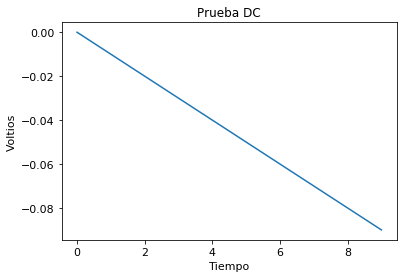

In [44]:
figura = plt.figure()
plt.title("Prueba DC")
plt.ylabel("Voltios")
plt.xlabel("Tiempo")
plt.plot(resultados['dc']['V1'], resultados['dc']['I(V1)'], label="Voltaje (V1)")

> **Pregunta:** comenta la gráfica anterior… ¿qué estamos viendo exactamente? Etiqueta los ejes de la misma convenientemente. Así como ningún número puede *viajar* solo sin hacer referencia a su naturaleza, ninguna gráfica puede estar sin sus ejes convenientemente etiquetados. Algo de [ayuda](https://matplotlib.org/3.1.0/gallery/pyplots/fig_axes_labels_simple.html). ¿Qué biblioteca estamos usando para graficar? Una [pista](https://matplotlib.org).

> Estamos viendo una línea recta que es la corriente contínua a la cual le vamos subiendo el voltaje de manera regular de 0 a 10 y de dos en dos. La libreria que usamos para pintar la gráfica es **Matplotlib**, que se utiliza en muchas plataformas y entornos interactivos. Se suele usar en scripts y shells de Python, con Jupyter, en servidores web etc .

 ### Resultados de la simulación `.op` 
 El método `.results` nos devuelve un diccionario con los resultados de la simulación.

In [14]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.09}


 > **Pregunta:** justifica el sencillo resultado anterior (análisis `op`). Repite el cálculo con Sympy, atendiendo con mimo a las unidades y al formateo de los resultados (tal y como hemos visto en muchos otros notebooks en clase).

 > Obtenemos este resultado tan sencillo, debido a que estamos utilizando como análisis del circuito el comando de simulación .op. Este comando es el mas sencillo de todos y nos deuelve el voltaje y la intensidad de cada ramal y componente del circuito. Alser el circuito más simple que se puede hacer por eso nos devuelve esos valores V1 =9 voltios y I(V1)= 0.09 amperios.

In [51]:
V = 9*u.volts
R1 = 100*u.ohms

intensidad = u.Quantity('i')
intensidad.set_dimension(u.current)
ley_ohm = Eq(V, intensidad*R1)
print("Expresamos la ley de Ohm: ")
pprint(ley_ohm)
solucion_para_intensidad = solve(ley_ohm, intensidad)
corriente_Circuito=convert_to(solucion_para_intensidad[0], [u.ampere]).n(2)
print()
print("Mostramos V1 e I(V1) respectivamente y con sus unidades tal y como ha hecho ahkab antes: ")
pprint(V)
pprint(corriente_Circuito)

Expresamos la ley de Ohm: 
9⋅volt = 100⋅i⋅ohm

Mostramos V1 e I(V1) respectivamente y con sus unidades tal y como ha hecho ahkab antes: 
9⋅volt
0.09⋅ampere


 ## Análisis de circuito con resistencias en serie

Vamos a resolver (en punto de operación) el siguiente circuito:

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true)

Al igual que antes, grabamos el netlist en disco desde Jupyter gracias a la *palabra mágica* [`%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile). 

In [18]:
%%writefile "resistencias en serie.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Writing resistencias en serie.net


In [19]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en serie.net')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess:skipped. (linear circuit)
Solving... done.
Solving... done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimos los resultados del análisis `.op`:

In [20]:
print(resultados['op'])

OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serie.net).
Run on 2019-12-17 10:04:10, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0


Los cantidades `V1`, `V2` y `V3` hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (`1`, `2`, etc.). Por ejemplo, podemos calcular el *potencial consumido* por la resistencia `R1` y verás que coincide con el del punto `V2` devuelto por Ahkab. 

In [23]:
r1 = 3E3*u.ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*u.ampere
pprint(intensidad_ahkab)
v2 = convert_to(intensidad_ahkab*r1, [u.volt])
pprint(v2)

-0.0005⋅ampere
-1.5⋅volt


 > **Pregunta**: reproduce el resto de los valores anteriores de manera *manual* mediante Sympy (es decir, aplicando la ley de Ohm, pero con tun *toque computacional*). Te pongo aquí un ejemplo del que puedes partir… En él sólo calculo la corriente que circula por el circuito (sí, justo la que antes Ahkab ha devuelto de manera automática). Para ello necesito previamente computar la resistencia total (`r_total`). Faltarían el resto de resultados y convertirlos a unidades más *vistosas* (mediante la orden `convert_to` y `.n()`).

In [170]:
v1 = 9*u.volts
r1 = 3*u.kilo*u.ohms
r2 = 10*u.kilo*u.ohms
r3 = 5*u.kilo*u.ohms
r_total = r1 + r2 + r3
intensidad = u.Quantity('i')
intensidad.set_dimension(u.current)
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
corriente_Circuito=convert_to(solucion_para_intensidad[0], [u.ampere]).n(2)

v1 = convert_to(corriente_Circuito*r_total, [u.volt]).n(2) 
v2 = convert_to(corriente_Circuito*r1, [u.volt]).n(2)
v3 = convert_to(corriente_Circuito*(r1+r2), [u.volt]).n(2)

print("La corriente que circula por el circuito es: ")
pprint(corriente_Circuito)
print()
print("El valor del potencial que se ha perdido en nuestro V1 es: ")
pprint(v1)
print()
print("El valor del potencial que se ha perdido en nuestro V2 es: ")
pprint(v2)
print()
print("El valor del potencial que se ha perdido en nuestro V3 es: ")
pprint(v3)

La corriente que circula por el circuito es: 
0.0005⋅ampere

El valor del potencial que se ha perdido en nuestro V1 es: 
0.009⋅Prefix('kilo', 'k', 3)⋅volt

El valor del potencial que se ha perdido en nuestro V2 es: 
0.0015⋅Prefix('kilo', 'k', 3)⋅volt

El valor del potencial que se ha perdido en nuestro V3 es: 
0.0065⋅Prefix('kilo', 'k', 3)⋅volt


> **<u>NOTA</u>** : <mark>no soy capaz de mostrar los valores resultantes de una forma más atractiva a la vista, debe ser una tonteria que se me escapa. Si las resistencias en vez de estar en u.kilo las pongo de forma 3E3*u.ohms si salen bien. </mark>

> **Pregunta**: Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy.

$$
\sum_i^N V_{\text{fuentes}} = \sum_j^M V_{\text{consumido en resistencias}}
$$

Ten en cuenta que en este caso sólo hay una fuente.

In [182]:
# Demostración Ley de Kirchhoff

V = 9*u.volts
Ley_Kirchhoff = Eq(0, r1*corriente_Circuito + r2*corriente_Circuito + r3*corriente_Circuito - V)

print("Conocemos cuanto vale el Voltaje de la pila:")
pprint(V)
print()
print("También conocemos el valor de las resistencias y de la corriente que pasa por el circuito: ")
pprint(corriente_Circuito)
pprint(r1)
pprint(r2)
pprint(r3)
print()
print("Según la ley de Kirchhoff nos dice que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias")
pprint(ley_Kirchhoff)




Conocemos cuanto vale el Voltaje de la pila:
9⋅volt

También conocemos el valor de las resistencias y de la corriente que pasa por el circuito: 
0.0005⋅ampere
3⋅Prefix('kilo', 'k', 3)⋅ohm
10⋅Prefix('kilo', 'k', 3)⋅ohm
5⋅Prefix('kilo', 'k', 3)⋅ohm

Según la ley de Kirchhoff o ley de tensiones nos dice que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias
0 = 0.009⋅Prefix('kilo', 'k', 3)⋅ampere⋅ohm - 9⋅volt


## Análisis `.op` de circuitos con resistencias en paralelo

Vamos a complicar un poco el trabajo añadiendo elementos en paralelo.

 > **Pregunta**: realiza los análisis `.op` de los siguientes circuitos.
 Para ello crea un netlist separado para cada uno donde queden correctamente descritos
 junto con la simulación (`.op`). Comenta los resultados que devuelve Ahkab (no imprimas los resultados de las simulaciones *sin más*).

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20paralelo.svg?sanitize=true)

 Aquí tienes el análisis del primer circuito, para que sirva de ejemplo:

In [313]:
%%writefile "resistencias en paralelo 1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 2 3 220
r4 3 0 1.5k
r5 2 0 470
.op
.end

Overwriting resistencias en paralelo 1.cir


In [314]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess:skipped. (linear circuit)
Solving... done.
Solving... done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis `.op`. Como puedes comprobar, Ahkab sólo reporta la intensidad de corriente en las ramas en las que hay una pila (en este caso, la rama donde está la pila `VDD`).

In [315]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1.cir).
Run on 2019-12-17 19:28:02, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23533e-12    0
V3          V         -2.8215      2.82151e-12    0
I(VDD)      A         -0.00876467  0              0


> 

In [319]:
%%writefile "resistencias paralelo 2.cir"
*Circuito con resistencias en paralelo número 2*
v1 0 1 type=vdc vdc=9
R1 1 2 47
R2 2 3 220
R3 2 4 180
R4 3 5 1k
R5 5 0 560
v2 0 4 type=vdc vdc=1.5
*Análisis del circuito
.op
.end

Writing resistencias paralelo 2.cir


In [320]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias paralelo 2.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultadosParalelo2 = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess:skipped. (linear circuit)
Solving... done.
Solving... done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [321]:
print(resultadosParalelo2['op'])

OP simulation results for '*circuito con resistencias en paralelo nãºmero 2*'(netlist resistencias paralelo 2.cir).
Run on 2019-12-17 19:46:57, data file None.
Variable    Units         Value        Error    %
----------  -------  ----------  -----------  ---
V1          V        -9          9e-12          0
V2          V        -7.29441    7.29442e-12    0
V3          V        -6.39285    6.39285e-12    0
V4          V        -1.5        1.50001e-12    0
V5          V        -2.29487    2.29487e-12    0
I(V1)       A        -0.0362891  0              0
I(V2)       A         0.0321912  0              0


> En el circuito de resistencias paralelo 2 lo que nos está dando ahkab son los distintos voltajes en los nodos descritos, por ejemplo en el nodo 1 un voltaje de 9 voltios y posteriormente ya tenemos caidas de tension cada vez que pasamos por una resistencia.En V2 tenemos una caida de 7.3 aprox. en V3 = 6.4 en V4 = 1.5 y en V5 = 2.3. Ahkab también nos está mostrando las intensidades de corriente que pasa por V1 y V2 pero no tenemos la que pasa por la rama de la derecha. Esto se podría calcular con la segunda ley de kirchhoff que nos dice que I = I1 +I2. Nosotros conocemos, ya que nos lo da spice, I e I2, con eso podríamos sacar I1 y saber la intensidad de corriente en dicha rama.

In [322]:
%%writefile "resistencias paralelo 3.cir"
*Circuito con resistencias en paralelo número 3*
V4 0 1 type=vdc vdc=9
V1 1 2 type=vdc vdc=0
R1 2 0 10k
v2 1 3 type=vdc vdc=0
R2 3 0 2k
v3 1 4 type=vdc vdc=0
R3 4 0 1k
*Análisis del circuito
.op
.end

Writing resistencias paralelo 3.cir


In [323]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias paralelo 3.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultadosParalelo3 = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess:skipped. (linear circuit)
Solving... done.
Solving... done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [324]:
print(resultadosParalelo3['op'])

OP simulation results for '*circuito con resistencias en paralelo nãºmero 3*'(netlist resistencias paralelo 3.cir).
Run on 2019-12-17 19:47:45, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V        -9         9e-12    0
V2          V        -9         9e-12    0
V3          V        -9         9e-12    0
V4          V        -9         9e-12    0
I(V4)       A        -0.0144    0        0
I(V1)       A        -0.0009    0        0
I(V2)       A        -0.0045    0        0
I(V3)       A        -0.009     0        0


> En el circuito de resistencias paralelo 3 lo que nos está dando ahkab son los distintos voltajes en los nodos descritos,
en este caso tenemos que tanto V1 como V2, V3 y V4 tienen el mismo potencial ya que las pilas 1,2 y 3 son de 0 voltios que es como si fueran simples cables. Ahora bien, las corrientes eléctricas son distintas para cada rama del circuito, teniendo que para V4 que en nuestro caso es la pila de 9voltios tiene una corriente de 0.0144 para la V1 = 0.0009, V2 = 0.0045 y V3=0.009 todos ellos con unidadesd e amperios ya que es la intensidad en cada nodo.

> **Pregunta:** inserta dos *pilas virtuales* de 0 voltios en el resto de ramas del circuito (`Vdummy1` en la rama donde está `R5` y `Vdummy2` en la rama donde está `R3` y `R4`) para que Ahkab nos imprima también la corriente en las mismas. Es muy parecido al tercer circuito que tienes que resolver, donde `V1`, `V2` y `V3` tienen cero voltios. Estas *pilas nulas* son, a todos los efectos, *simples cables*. Una vez que ya tienes las corrientes en todas las ramas, comprueba que se cumple la Ley de Kirchhoff para las corrientes:

$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$

Repite lo mismo para los otros dos circuitos. Realiza además los cálculos con Sympy (recalcula los mismos voltajes que devuelve Ahkab a partir de la corriente que sí te devuelve la simulación) y cuidando de no olvidar las unidades. Recuerda que el objeto `resultados` alberga toda la información que necesitas de manera indexada. Ya han aparecido un ejemplo más arriba. Es decir: no *copies* los números *a mano*, trabaja de manera informáticamente elegante (usando la variable `resultados`).

> Definimos el circuito con las dos pilas a 0V en el resto de ramas:


In [349]:
%%writefile "resistencias pilas virtuales.cir"
* resistencias en paralelo
v1 0 1 vdc=12 type=vdc
v2 2 3 vdc=0 type=vdc
v3 2 5 vdc=0 type=vdc
r2 1 2 1000
r3 3 4 220
r4 4 0 1500
r5 5 0 470
.op
.end

Overwriting resistencias pilas virtuales.cir


In [350]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias pilas virtuales.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultadosPilasVirtuales = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess:skipped. (linear circuit)
Solving... done.
Solving... done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [351]:
print(resultadosPilasVirtuales['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias pilas virtuales.cir).
Run on 2019-12-17 20:20:19, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23533e-12    0
V3          V         -3.23533     3.23533e-12    0
V5          V         -3.23533     3.23532e-12    0
V4          V         -2.8215      2.82151e-12    0
I(V1)       A         -0.00876467  0              0
I(V2)       A         -0.001881    0              0
I(V3)       A         -0.00688367  0              0


In [343]:
intensidad_ahkabV1 = resultadosPilasVirtuales['op']['I(V1)'][0][0]*u.ampere
intensidad_ahkabV2 = resultadosPilasVirtuales['op']['I(V2)'][0][0]*u.ampere
intensidad_ahkabV3 = resultadosPilasVirtuales['op']['I(V3)'][0][0]*u.ampere
voltajesV1 = resultadosPilasVirtuales['op']['V1'][0][0]*u.volt
voltajesV2 = resultadosPilasVirtuales['op']['V2'][0][0]*u.volt
voltajesV3 = resultadosPilasVirtuales['op']['V3'][0][0]*u.volt

print("Estas son las intensidades que pasan por los siguientes nodos, con sus correspondientes unidades (amperios): ")
print("I(V1)")
pprint(intensidad_ahkabV1)
print("I(V2)")
pprint(intensidad_ahkabV2)
print("I(V3)")
pprint(intensidad_ahkabV3)
print()
print("Estas son las caidas de potencial en cada nodo, con sus correspondientes unidades (voltios): ")
print("V1")
pprint(voltajesV1)
print("V2")
pprint(voltajesV2)
print("V3")
pprint(voltajesV3)

Estas son las intensidades que pasan por los siguientes nodos, con sus correspondientes unidades (amperios): 
I(V1)
-0.00876467449306297⋅ampere
I(V2)
-0.00188100320170758⋅ampere
I(V3)
-0.00688367129135539⋅ampere

Estas son las caidas de potencial en cada nodo, con sus correspondientes unidades (voltios): 
V1
-12.0⋅volt
V2
-3.23532550693703⋅volt
V3
-3.23532550693703⋅volt


 # Circuitos en DC que evolucionan con el tiempo

 ## Carga de un condensador
 Vamos a ver qué le pasa a un circuito de corriente continua cuando tiene un condensador
 en serie.

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensador%20en%20continua.svg?sanitize=true)

 Al igual que antes, primero guardamos el circuito en un netlist externo:

In [92]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Overwriting condensador en continua.ckt


> **Pregunta:** ¿qué significa el parámetro `ic=0`?¿qué perseguimos con un análisis de tipo `.tran`?

> Que el parámetro ic sea igual a 0 significa que el condensador no esta cargado inicialmente. Por otro lado con el tipo de análisis **<u>.tran</u>** buscamos realizar un análisis en el tiempo, y como el atributo de uic es igual a 0 este análisis se realiza desde un punto estable del funcionamiento del circuito hasta tstop en nuestro caso 8 segundos en intervalos de tstep = 0.1. 

Leamos el circuito:

In [93]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("condensador en continua.ckt")

 Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (`outfile`):

In [96]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "simulación tran.tsv"

 Ejecutamos la simulación:

In [97]:
resultados = ahkab.run(circuito, lista_de_análisis)
#print(resultados['op'])
print(resultados['tran'].keys())

Starting op analysis:
Calculating guess:skipped. (linear circuit)
Solving... done.
Solving... done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...done.
Average time step: 0.0869565
['T', 'V1', 'V2', 'I(V1)']


 Dibujamos la gráfica de carga del condensador con el tiempo, centrándonos en la intensidad que circula por la pila. 

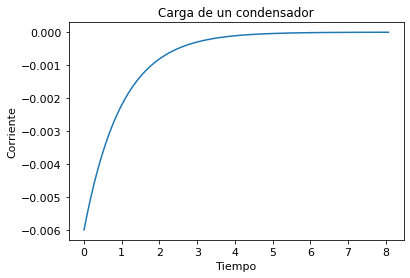

In [98]:
figura = plt.figure()
plt.title("Carga de un condensador")
plt.xlabel("Tiempo")
plt.ylabel("Corriente")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label="Una etiqueta")

> **Pregunta:** Etiqueta los ejes convenientemente y comenta la gráfica. Dibuja otra gráfica con el voltaje en el borne `V1`. ¿Por qué son *opuestas*? ¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo? Dibuja las gráficas en un formato estándar de representación vectorial (SVG, por ejemplo). Algo de ayuda [aquí](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.set_matplotlib_formats). ¿Qué valores devuelve el análisis de tipo `.op`? Justifícalo.


> En la gráfica podemos observar la carga de un condensador que conforme avanza el tiempo la carga llega a una asíntota y sobre los 4 segundos está prácticamente saturado. Llega un momento en que la corriente es 0.

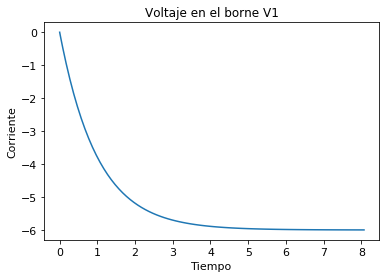

In [87]:
figura = plt.figure()
plt.title("Voltaje en el borne V1")
plt.xlabel("Tiempo")
plt.ylabel("Corriente")
plt.plot(resultados['tran']['T'], resultados['tran']['V2'], label="Una etiqueta")

> Las gráficas son opuestas ya que en esta última estamos midiendo el voltaje en el borne V1 donde todavía no ha llegado al condensador y por ello la gráfica se estabiliza al final del tiempo en 6 amperios. El voltaje aumenta asintóticamente según va pasando el tiempo hasta que más o menos por los 4 o 5 segundos se estabiliza en 6 amperios.

## Carrera de condensadores

Ahora tenemos un circuito con dos condensadores en paralelo: 

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensadores%20en%20paralelo.svg?sanitize=true)

> **Pregunta:** Crea el netlist de este circuito e identifica qué condensador se satura primero. Dibuja la evolución de la intensidad en ambas ramas de manera simultánea. [Aquí](https://matplotlib.org/gallery/api/two_scales.html) tienes un ejemplo de cómo se hace esto en Matplotlib. Recuerda que para que Ahkab nos devuelva la corriente en una rama, debe de estar presente una pila. Si es necesario, inserta pilas virtuales de valor nulo (cero voltios), tal y como hemos comentado antes. Grafica también los voltajes (en otra gráfica, pero que aparezcan juntos). 

In [124]:
%%writefile "Carrera de condensadores.ckt"
* Carga condensador
v0 0 1 type=vdc vdc=10
r1 0 2 3k
c1 2 3 47u ic=0
v1dummy 3 1 type=vdc vdc=0
c2 2 4 22u ic=0
v2dummy 4 1 type=vdc vdc=0
* Análisis circuito
.op
.tran tstep=0.01 tstop=1 uic=0
.end

Overwriting Carrera de condensadores.ckt


> Leemos el circuito

In [125]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("Carrera de condensadores.ckt")

Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (outfile):

In [126]:
circuitoCarrera = circuito_y_análisis[0]
anani_netl = circuito_y_análisis[1]
l_analis = ahkab.netlist_parser.parse_analysis(circuitoCarrera, anani_netl)
l_analis[1]['outfile'] = "pruebaC.tsv"

In [127]:
resultados = ahkab.run(circuitoCarrera, l_analis)
#print(resultados['op'])
print(resultados['tran'].keys())

Starting op analysis:
Calculating guess:skipped. (linear circuit)
Solving... done.
Solving... done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...done.
Average time step: 0.00900901
['T', 'V1', 'V2', 'V3', 'V4', 'I(V0)', 'I(V1DUMMY)', 'I(V2DUMMY)']


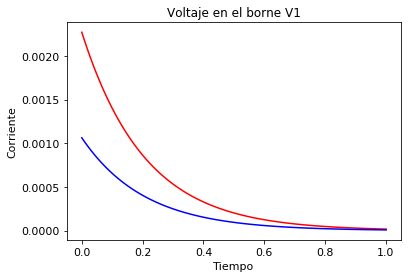

In [128]:
figura = plt.figure()
plt.title("Voltaje en el borne V1")
plt.xlabel("Tiempo")
plt.ylabel("Corriente")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'], label="Una etiqueta", color="red")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V2DUMMY)'], label="Una etiqueta", color="blue")